In [274]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

import numpy as np

In [275]:
N = 1000
C = 2
X, y = make_blobs(n_samples=N, centers=C, n_features=C, random_state=988)

Text(0.5, 1.0, 'Artificial perceptron dataset')

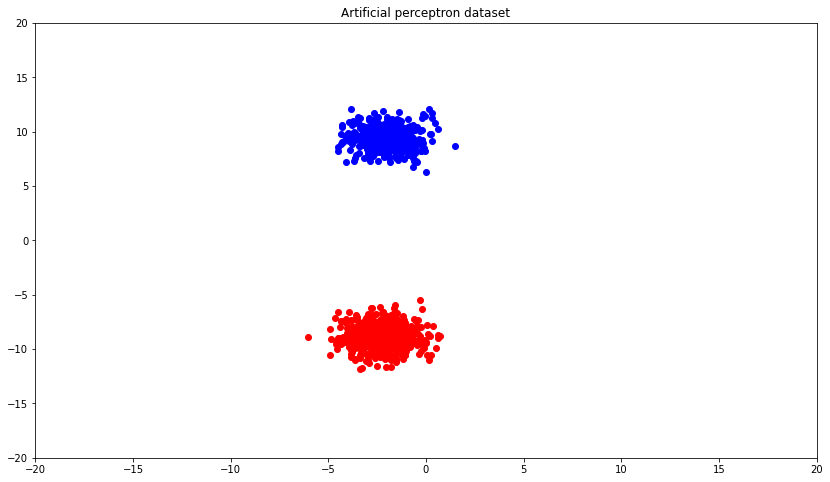

In [276]:
fig = plt.figure(figsize=(14,8))
BX = 20
plt.xlim([-BX, BX])
plt.ylim([-BX, BX])
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b')
plt.title("Artificial perceptron dataset")

In [277]:
def unit_step(x):
    d = np.copy(x)
    d[x <= 0] = -1
    d[x > 0] = 1
    return d

def binary_threshold(x):
    d = np.copy(x)
    d[x > 0] = 1
    return d

def tlu(x):
    d = np.copy(x)
    d[x < -1] = -1
    d[x > 1] = 1
    return d

def tanh(x, c = 1.0):
    return (1 - np.exp(-c * x))/(1 + np.exp(-c * x))

def logistic(x, c = 1.0):
    return 1.0/(1.0 + np.exp(- c * x))


In [278]:


def perceptron(X, y, epsilon: float = 1e-2, alpha: float = 0.001, max_iter: int = 1000):
    theta = np.zeros(X.shape[1] + 1)
    X_bias = np.vstack((X.T, np.ones(X.shape[0]))).T
    for i in range(max_iter):
        for j, x in enumerate(X_bias):
            dt = binary_threshold(np.dot(x, theta))
            theta1 = alpha * (y[j] - dt) * x
            theta += theta1
        err = np.sum(np.abs(y - binary_threshold(X_bias @ theta)))/X.shape[0]
        if err < epsilon:
            break
    return theta


In [279]:
theta = perceptron(X, y)

In [280]:
def plot_decision_boundary(X, y, theta, BX = 20):
    fig = plt.figure(figsize=(14,8))
    plt.xlim([-BX, BX])
    plt.ylim([-BX, BX])
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r')
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b')

    # Decision boundary
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x1 = np.array([[-BX, -BX], [BX, BX]])
    x2 = m*x1 + c
    plt.plot(x1, x2)

    plt.title("Artificial perceptron dataset")

In [281]:
from mpl_toolkits.mplot3d import Axes3D

def plot_decision_boundary3d(X, y, theta, BX = 20):
    fig = plt.figure(figsize=(14,8))
    ax = fig.add_subplot(projection='3d')
    #ax.xlim([-BX, BX])
    #ax.ylim([-BX, BX])
    #ax.zlim([-BX, BX])
    ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], c='r', alpha=1.0)
    ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], c='b', alpha=1.0)

    ax.axes.set_zlim3d(bottom=-BX, top=BX)

    # Decision boundary
    xx, yy = np.meshgrid(range(-BX, BX), range(-BX, BX))
    z = (-theta[1] * xx - theta[2] * yy - theta[0]) / theta[3]
    ax.plot_surface(xx, yy, z, alpha=0.2, color='green')

    plt.title("Artificial perceptron dataset")


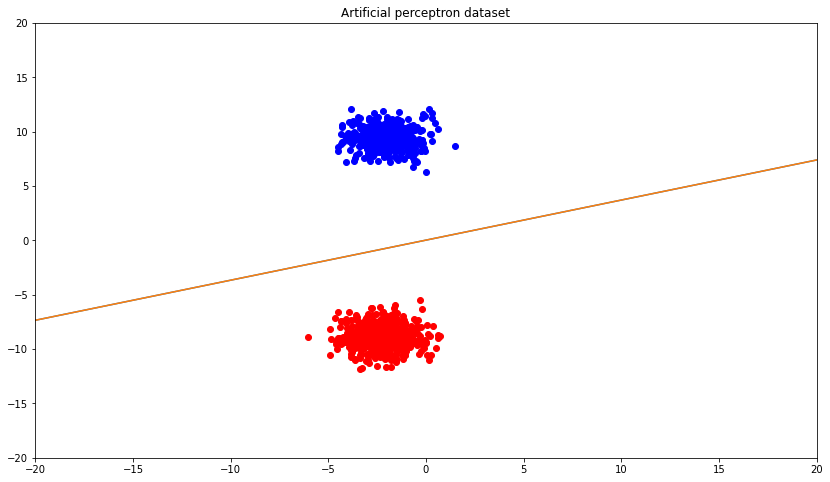

In [282]:
plot_decision_boundary(X, y, theta)

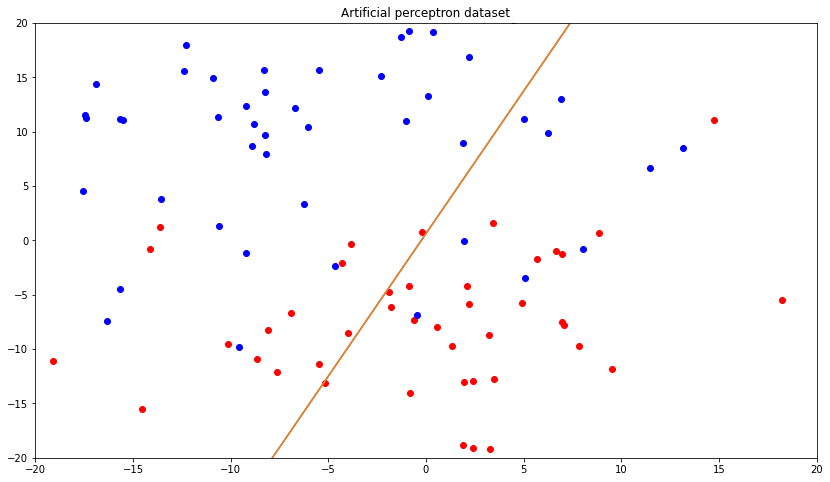

In [285]:
N = 100
X, y = make_blobs(n_samples=N, centers=C, n_features=2, cluster_std=9.0, random_state=988)
theta = perceptron(X, y)
plot_decision_boundary(X, y, theta)

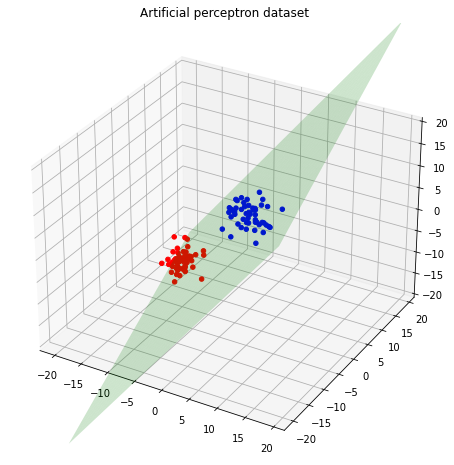

In [284]:
N = 100
X, y = make_blobs(n_samples=N, centers=C, n_features=3, cluster_std=2.0, random_state=988)
theta = perceptron(X, y)
plot_decision_boundary3d(X, y, theta)